In [287]:
# Import necessary libraries
import pandas as panda

In [288]:
#reading data
monkeyPoxDf=panda.read_csv('/content/Monkeypox Coursework Dataset.csv')

In [289]:
print(list(monkeyPoxDf.columns))

['Test ID', 'Systemic Illness', 'Encoded Systemic Illness', 'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection', 'Red blood cells count', 'White blood cells count', 'Home ownership', 'Age', 'Month of Birth', 'Health Insurance', 'Sexually Transmitted Infection', 'MPOX PCR Result']


In [290]:
#column and it's datatype
monkeyPoxDf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Test ID                         25000 non-null  object 
 1   Systemic Illness                24998 non-null  object 
 2   Encoded Systemic Illness        24998 non-null  float64
 3   Rectal Pain                     24997 non-null  float64
 4   Sore Throat                     25000 non-null  int64  
 5   Penile Oedema                   24994 non-null  float64
 6   Oral Lesions                    24996 non-null  object 
 7   Solitary Lesion                 25000 non-null  int64  
 8   Swollen Tonsils                 24993 non-null  float64
 9   HIV Infection                   24995 non-null  float64
 10  Red blood cells count           25000 non-null  int64  
 11  White blood cells count         25000 non-null  int64  
 12  Home ownership                  

In [291]:
monkeyPoxDf.shape

(25000, 18)

In [292]:
monkeyPoxDf['MPOX PCR Result'].value_counts()

Positive    15909
Negative     9091
Name: MPOX PCR Result, dtype: int64

In [293]:
#Encoded the categorical target varible ((Positive, Negative)) Into (1,0)
map_dict = {
    'Positive':1,
    'Negative': 0,
}
monkeyPoxDf['MPOX PCR Result']=monkeyPoxDf['MPOX PCR Result'].map(map_dict)


In [294]:
#1.a droping redundant columns from dataset, inplace true=overright dataframe
monkeyPoxDf.drop(['Test ID','Systemic Illness', 'Home ownership'], axis=1, inplace=True)


In [295]:

monkeyPoxDf.dtypes

Encoded Systemic Illness          float64
Rectal Pain                       float64
Sore Throat                         int64
Penile Oedema                     float64
Oral Lesions                       object
Solitary Lesion                     int64
Swollen Tonsils                   float64
HIV Infection                     float64
Red blood cells count               int64
White blood cells count             int64
Age                                object
Month of Birth                      int64
Health Insurance                    int64
Sexually Transmitted Infection    float64
MPOX PCR Result                     int64
dtype: object

In [296]:
#2.a statistical description of retain dataset
monkeyPoxDf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Encoded Systemic Illness,24998.0,1.497640e+00,1.116872,0.0,1.00,1.0,3.0,3.0
Rectal Pain,24997.0,4.938193e-01,0.499972,0.0,0.00,0.0,1.0,1.0
Sore Throat,25000.0,5.021600e-01,0.500005,0.0,0.00,1.0,1.0,1.0
Penile Oedema,24994.0,5.044411e-01,0.499990,0.0,0.00,1.0,1.0,1.0
Solitary Lesion,25000.0,5.010800e-01,0.500009,0.0,0.00,1.0,1.0,1.0
Swollen Tonsils,24993.0,5.012604e-01,0.500008,0.0,0.00,1.0,1.0,1.0
HIV Infection,24995.0,5.033007e-01,0.499999,0.0,0.00,1.0,1.0,1.0
Red blood cells count,25000.0,5.004591e+06,520475.952328,4100135.0,4555417.75,5002304.0,5458530.5,5899806.0
White blood cells count,25000.0,7.749114e+03,1885.213591,4500.0,6116.00,7747.0,9379.0,11000.0
Month of Birth,25000.0,6.517040e+00,3.441038,1.0,4.00,7.0,10.0,12.0


In [297]:
#calculation percentage (Positive, Negative) of class variable

countOfClass=monkeyPoxDf['MPOX PCR Result'].value_counts()
percentage_of_class=countOfClass/countOfClass.sum() * 100
print(f"Positive: {percentage_of_class[1]:.2f}%")
print(f"Negative: {percentage_of_class[0]:.2f}%")
print(f"Positive: {countOfClass[1]}")
print(f"Negative: {countOfClass[0]}")
print(f"Total: {countOfClass[0]+countOfClass[1]}")


Positive: 63.64%
Negative: 36.36%
Positive: 15909
Negative: 9091
Total: 25000


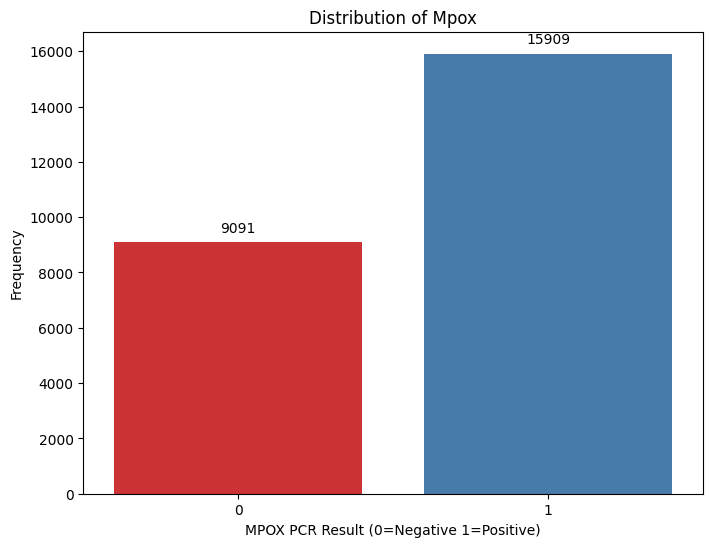

In [298]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot
plt.figure(figsize=(8, 6))
# sns.countplot(data=monkeyPoxDf, x=monkeyPoxDf['Encoded Mpox PCR Result'], palette='Set1')
sns.countplot(data=monkeyPoxDf, x=monkeyPoxDf['MPOX PCR Result'], palette='Set1')
# Add count labels on top of the bars
for p in plt.gca().patches:
  plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Distribution of Mpox')
plt.xlabel('MPOX PCR Result (0=Negative 1=Positive)')
plt.ylabel('Frequency')
plt.show()

In [299]:
#viewing missing or null value of each feature
monkeyPoxDf.isnull().sum()

Encoded Systemic Illness           2
Rectal Pain                        3
Sore Throat                        0
Penile Oedema                      6
Oral Lesions                       4
Solitary Lesion                    0
Swollen Tonsils                    7
HIV Infection                      5
Red blood cells count              0
White blood cells count            0
Age                               36
Month of Birth                     0
Health Insurance                   0
Sexually Transmitted Infection     4
MPOX PCR Result                    0
dtype: int64

In [300]:
#calculation percentage of each features
monkeyPoxDf.isna().sum()/len(monkeyPoxDf)*100


Encoded Systemic Illness          0.008
Rectal Pain                       0.012
Sore Throat                       0.000
Penile Oedema                     0.024
Oral Lesions                      0.016
Solitary Lesion                   0.000
Swollen Tonsils                   0.028
HIV Infection                     0.020
Red blood cells count             0.000
White blood cells count           0.000
Age                               0.144
Month of Birth                    0.000
Health Insurance                  0.000
Sexually Transmitted Infection    0.016
MPOX PCR Result                   0.000
dtype: float64

In [301]:
# Display the overall missing percentage
overall_missing_percentage = (monkeyPoxDf.isnull().sum().sum() / (monkeyPoxDf.shape[0] * monkeyPoxDf.shape[1])) * 100
print(f"Overall Missing Percentage: {overall_missing_percentage:.2f}%")

Overall Missing Percentage: 0.02%


In [302]:
#cleaning missing value
monkeyPoxDf_drop = monkeyPoxDf.dropna()
monkeyPoxDf=monkeyPoxDf_drop

In [303]:
#after cleaning missing value count
monkeyPoxDf.isnull().sum()

Encoded Systemic Illness          0
Rectal Pain                       0
Sore Throat                       0
Penile Oedema                     0
Oral Lesions                      0
Solitary Lesion                   0
Swollen Tonsils                   0
HIV Infection                     0
Red blood cells count             0
White blood cells count           0
Age                               0
Month of Birth                    0
Health Insurance                  0
Sexually Transmitted Infection    0
MPOX PCR Result                   0
dtype: int64

In [304]:
#after cleaning missing value percentage
monkeyPoxDf_drop.isna().sum()/len(monkeyPoxDf_drop)*100

Encoded Systemic Illness          0.0
Rectal Pain                       0.0
Sore Throat                       0.0
Penile Oedema                     0.0
Oral Lesions                      0.0
Solitary Lesion                   0.0
Swollen Tonsils                   0.0
HIV Infection                     0.0
Red blood cells count             0.0
White blood cells count           0.0
Age                               0.0
Month of Birth                    0.0
Health Insurance                  0.0
Sexually Transmitted Infection    0.0
MPOX PCR Result                   0.0
dtype: float64

In [305]:
after_cleaning_overall_missing_percentage = (monkeyPoxDf_drop.isnull().sum().sum() / (monkeyPoxDf_drop.shape[0] * monkeyPoxDf_drop.shape[1])) * 100

# the overall missing percentage after cleaning
print(f"After cleaning Overall Missing Percentage: {after_cleaning_overall_missing_percentage:.2f}%")

After cleaning Overall Missing Percentage: 0.00%


In [306]:
#count different kind of value
monkeyPoxDf['Oral Lesions'].value_counts()


0      12474
1      12449
No         7
YES        4
Name: Oral Lesions, dtype: int64

In [307]:
#replace yes no with 1, 0
def replace_YesNo(Oral_Lesions):
    if Oral_Lesions == 'YES':
        return 1
    elif Oral_Lesions == 'No':
        return 0
    else:
        return Oral_Lesions

# Apply the function to the 'Oral Lesions' column
monkeyPoxDf['Oral Lesions'] = monkeyPoxDf['Oral Lesions'].apply(replace_YesNo)


In [308]:
monkeyPoxDf['Oral Lesions'] = monkeyPoxDf['Oral Lesions'].astype(float)

In [309]:
monkeyPoxDf['Oral Lesions'].value_counts()

0.0    12481
1.0    12453
Name: Oral Lesions, dtype: int64

In [310]:
#count different kind of value
monkeyPoxDf['Swollen Tonsils'].value_counts()

1.0    12497
0.0    12437
Name: Swollen Tonsils, dtype: int64

In [311]:
monkeyPoxDf['Swollen Tonsils'].dtype

dtype('float64')

In [313]:
#count different kind of value
monkeyPoxDf['HIV Infection'].value_counts()

1.0    12552
0.0    12382
Name: HIV Infection, dtype: int64

In [312]:
monkeyPoxDf['HIV Infection'].dtype

dtype('float64')

<Axes: xlabel='Red blood cells count'>

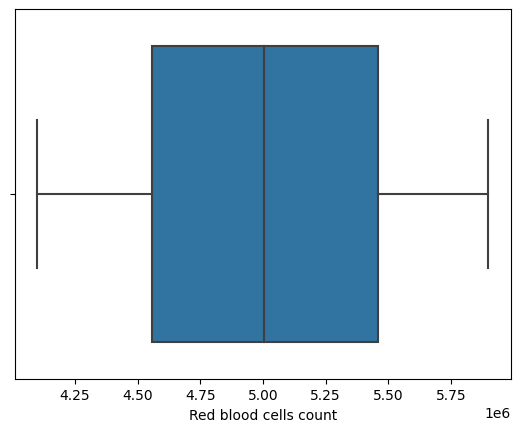

In [314]:
# to find if there is outlier
sns.boxplot(x=monkeyPoxDf['Red blood cells count'])


In [315]:
#display basic statistic
monkeyPoxDf['Red blood cells count'].describe()

count    2.493400e+04
mean     5.004841e+06
std      5.204626e+05
min      4.100135e+06
25%      4.555602e+06
50%      5.002641e+06
75%      5.459191e+06
max      5.899806e+06
Name: Red blood cells count, dtype: float64

<Axes: xlabel='White blood cells count'>

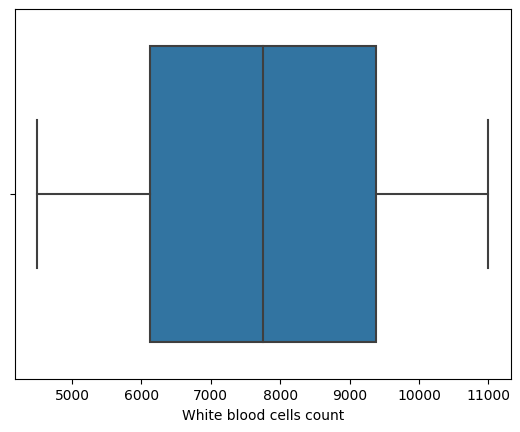

In [316]:
# to find if there is outlier
sns.boxplot(x=monkeyPoxDf['White blood cells count'])

In [317]:
#display basic statistic
monkeyPoxDf['Red blood cells count'].describe()

count    2.493400e+04
mean     5.004841e+06
std      5.204626e+05
min      4.100135e+06
25%      4.555602e+06
50%      5.002641e+06
75%      5.459191e+06
max      5.899806e+06
Name: Red blood cells count, dtype: float64

In [318]:
#count different kind of value
monkeyPoxDf['Age'].value_counts()

47        697
33        683
50        683
58        675
43        675
48        673
41        671
46        668
53        667
37        667
60        664
26        654
29        654
49        651
34        650
39        649
35        646
59        641
25        640
36        639
55        635
45        634
32        632
52        628
61        628
23        624
28        624
40        623
31        622
51        621
38        620
44        617
42        614
30        609
24        603
57        595
54        589
27        582
56        582
150         1
0           1
Twenty      1
181         1
-23         1
Name: Age, dtype: int64

In [319]:
#replacing text with 0
def removeText(age):
    if age=='Twenty':
        return 0
    else:
        return age

# Apply the function to the 'Age' column
monkeyPoxDf['Age'] = monkeyPoxDf['Age'].apply(removeText)

In [320]:
monkeyPoxDf['Age'].value_counts()

47     697
33     683
50     683
58     675
43     675
48     673
41     671
46     668
53     667
37     667
60     664
26     654
29     654
49     651
34     650
39     649
35     646
59     641
25     640
36     639
55     635
45     634
32     632
52     628
61     628
23     624
28     624
40     623
31     622
51     621
38     620
44     617
42     614
30     609
24     603
57     595
54     589
27     582
56     582
150      1
0        1
0        1
181      1
-23      1
Name: Age, dtype: int64

In [321]:
#change datatype object to float
monkeyPoxDf['Age'] = monkeyPoxDf['Age'].astype(float)

In [322]:
#display basic statistic
monkeyPoxDf['Age'].describe()

count    24934.000000
mean        42.057512
std         11.256755
min        -23.000000
25%         32.000000
50%         42.000000
75%         52.000000
max        181.000000
Name: Age, dtype: float64

<Axes: xlabel='Age'>

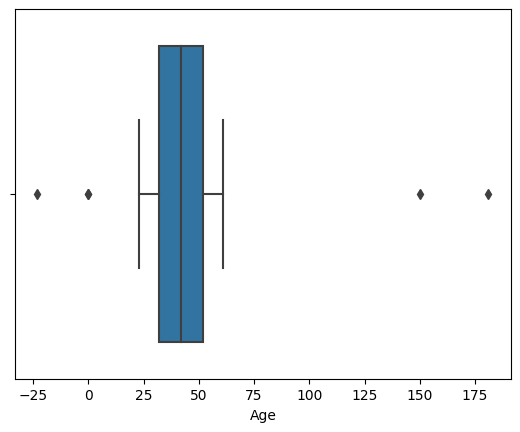

In [323]:
#finding outlier
sns.boxplot(x=monkeyPoxDf['Age'])

In [324]:
#get median
median_AGE = monkeyPoxDf['Age'].median()
median_AGE

42.0

In [325]:
#populating outlier with median
def populateMedian(age):
    if age <=0 or age>100:
        return median_AGE
    else:
        return age

monkeyPoxDf['Age'] = monkeyPoxDf['Age'].apply(populateMedian)

In [326]:
#no significant change after populating
monkeyPoxDf['Age'].describe()

count    24934.000000
mean        42.053581
std         11.187551
min         23.000000
25%         32.000000
50%         42.000000
75%         52.000000
max         61.000000
Name: Age, dtype: float64

In [327]:
#display age after cleaning
monkeyPoxDf['Age'].value_counts()

47.0    697
33.0    683
50.0    683
58.0    675
43.0    675
48.0    673
41.0    671
46.0    668
37.0    667
53.0    667
60.0    664
26.0    654
29.0    654
49.0    651
34.0    650
39.0    649
35.0    646
59.0    641
25.0    640
36.0    639
55.0    635
45.0    634
32.0    632
52.0    628
61.0    628
23.0    624
28.0    624
40.0    623
31.0    622
51.0    621
38.0    620
42.0    619
44.0    617
30.0    609
24.0    603
57.0    595
54.0    589
56.0    582
27.0    582
Name: Age, dtype: int64

<Axes: xlabel='Age'>

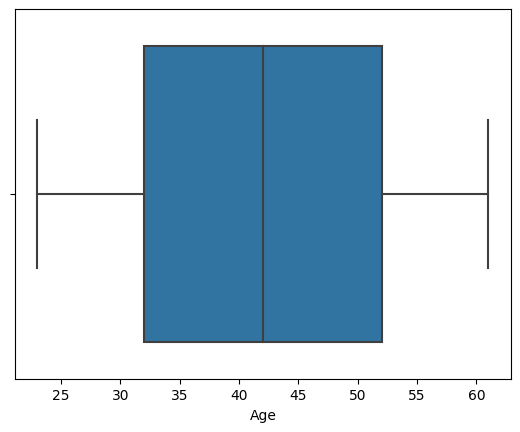

In [328]:
#display outlier after cleaning
sns.boxplot(x=monkeyPoxDf['Age'])

In [329]:
#to find any issues from statistical
monkeyPoxDf['Month of Birth'].describe()

count    24934.000000
mean         6.515320
std          3.440306
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: Month of Birth, dtype: float64

In [330]:
monkeyPoxDf['Sexually Transmitted Infection'].value_counts()

0.0    12522
1.0    12412
Name: Sexually Transmitted Infection, dtype: int64

In [331]:
monkeyPoxDf['Sexually Transmitted Infection'].dtype

dtype('float64')

In [332]:
monkeyPoxDf.dtypes

Encoded Systemic Illness          float64
Rectal Pain                       float64
Sore Throat                         int64
Penile Oedema                     float64
Oral Lesions                      float64
Solitary Lesion                     int64
Swollen Tonsils                   float64
HIV Infection                     float64
Red blood cells count               int64
White blood cells count             int64
Age                               float64
Month of Birth                      int64
Health Insurance                    int64
Sexually Transmitted Infection    float64
MPOX PCR Result                     int64
dtype: object

In [333]:
monkeyPoxDf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Encoded Systemic Illness,24934.0,1.497353e+00,1.116833,0.0,1.00,1.0,2.75,3.0
Rectal Pain,24934.0,4.940242e-01,0.499974,0.0,0.00,0.0,1.00,1.0
Sore Throat,24934.0,5.019251e-01,0.500006,0.0,0.00,1.0,1.00,1.0
Penile Oedema,24934.0,5.042512e-01,0.499992,0.0,0.00,1.0,1.00,1.0
Oral Lesions,24934.0,4.994385e-01,0.500010,0.0,0.00,0.0,1.00,1.0
Solitary Lesion,24934.0,5.009224e-01,0.500009,0.0,0.00,1.0,1.00,1.0
Swollen Tonsils,24934.0,5.012032e-01,0.500009,0.0,0.00,1.0,1.00,1.0
HIV Infection,24934.0,5.034090e-01,0.499998,0.0,0.00,1.0,1.00,1.0
Red blood cells count,24934.0,5.004841e+06,520462.583946,4100135.0,4555602.25,5002641.0,5459190.75,5899806.0
White blood cells count,24934.0,7.748958e+03,1885.325223,4500.0,6116.00,7746.0,9378.00,11000.0


In [334]:
monkeyPoxDf['MPOX PCR Result']=monkeyPoxDf['MPOX PCR Result'].astype(float)
monkeyPoxDf['MPOX PCR Result'].dtype


dtype('float64')

In [335]:
X = monkeyPoxDf.drop('MPOX PCR Result', axis=1)
y = monkeyPoxDf['MPOX PCR Result']

In [336]:
print(X.head)

<bound method NDFrame.head of        Encoded Systemic Illness  Rectal Pain  Sore Throat  Penile Oedema  \
0                           0.0          0.0            1            1.0   
1                           1.0          1.0            0            1.0   
2                           1.0          0.0            1            1.0   
3                           0.0          1.0            0            0.0   
4                           3.0          1.0            1            1.0   
...                         ...          ...          ...            ...   
24995                       0.0          1.0            1            0.0   
24996                       1.0          0.0            1            1.0   
24997                       0.0          1.0            1            0.0   
24998                       3.0          0.0            1            0.0   
24999                       3.0          0.0            0            1.0   

       Oral Lesions  Solitary Lesion  Swollen Tonsils  HI

In [337]:
#divide dataset into input/feature and target variable
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #scalling WIN MIN MAX SCALER
X=scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1) #randon state 1 remain same set for train and test

In [338]:
# Calculate the ratio of positive and negative values in the training set
positive_ratio_train = (sum(y_train == 1) / len(y_train)) * 100
negative_ratio_train = (sum(y_train == 0) / len(y_train)) * 100

# Calculate the ratio of positive and negative values in the testing set
positive_ratio_test = (sum(y_test == 1) / len(y_test)) * 100
negative_ratio_test = (sum(y_test == 0) / len(y_test)) * 100

# Print the ratios as percentages
print("Training Set:")
print("Positive Ratio: {:.2f}%".format(positive_ratio_train))
print("Negative Ratio: {:.2f}%".format(negative_ratio_train))

print("\nTesting Set:")
print("Positive Ratio: {:.2f}%".format(positive_ratio_test))
print("Negative Ratio: {:.2f}%".format(negative_ratio_test))

Training Set:
Positive Ratio: 63.76%
Negative Ratio: 36.24%

Testing Set:
Positive Ratio: 63.25%
Negative Ratio: 36.75%


In [339]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


# preparing Entire model
logr = LogisticRegression()
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
svm = SVC(kernel='rbf')
nb = GaussianNB()


# Train Model with train data
logr.fit(X_train, y_train)
dt.fit(X_train, y_train)
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)
nb.fit(X_train, y_train)


# Predic Model with test data
logr_preds = logr.predict(X_test)
dt_preds = dt.predict(X_test)
knn_preds = knn.predict(X_test)
svm_preds = svm.predict(X_test)
nb_preds = nb.predict(X_test)



# Evaluate all the models
print("logistic regration Accuracy: ", accuracy_score(y_test, logr_preds))
print(classification_report(y_test, logr_preds))

print("Decision Tree Accuracy: ", accuracy_score(y_test, dt_preds))
print(classification_report(y_test, dt_preds))

print("K-Nearest Neighbors Accuracy: ", accuracy_score(y_test, knn_preds))
print(classification_report(y_test, knn_preds))

print("SVM Accuracy: ", accuracy_score(y_test, svm_preds))
print(classification_report(y_test, svm_preds))

print("Naive Bayes Accuracy: ", accuracy_score(y_test, nb_preds))
print(classification_report(y_test, nb_preds))


logistic regration Accuracy:  0.6729226820660892
              precision    recall  f1-score   support

         0.0       0.62      0.28      0.39      2291
         1.0       0.68      0.90      0.78      3943

    accuracy                           0.67      6234
   macro avg       0.65      0.59      0.58      6234
weighted avg       0.66      0.67      0.63      6234

Decision Tree Accuracy:  0.582771896053898
              precision    recall  f1-score   support

         0.0       0.43      0.44      0.44      2291
         1.0       0.67      0.66      0.67      3943

    accuracy                           0.58      6234
   macro avg       0.55      0.55      0.55      6234
weighted avg       0.58      0.58      0.58      6234

K-Nearest Neighbors Accuracy:  0.6196663458453642
              precision    recall  f1-score   support

         0.0       0.48      0.36      0.41      2291
         1.0       0.67      0.77      0.72      3943

    accuracy                           0

In [341]:
from sklearn.metrics import roc_auc_score

# printing Auc-Roc
aucr_logr = roc_auc_score(y_test, logr_preds)
aucr_dt = roc_auc_score(y_test, dt_preds)
aucr_knn = roc_auc_score(y_test, knn_preds)
aucr_svm = roc_auc_score(y_test, svm_preds)
aucr_nb = roc_auc_score(y_test, nb_preds)


print("AUC-ROC score LG: \n", aucr_logr)
print("AUC-ROC score DT: \n", aucr_dt)
print("AUC-ROC score KNN: \n", aucr_knn)
print("AUC-ROC score SVM: \n", aucr_svm)
print("AUC-ROC score NB: \n", aucr_nb)

AUC-ROC score LG: 
 0.5908416342748859
AUC-ROC score DT: 
 0.5534082743698312
AUC-ROC score KNN: 
 0.5658406739512518
AUC-ROC score SVM: 
 0.5716585193215455
AUC-ROC score NB: 
 0.5891189741905967


In [342]:
#generating confussion matrix
from sklearn.metrics import confusion_matrix

logr_cmat = confusion_matrix(y_test, logr_preds)
print("Logistic Regretion Confusion Matrix: \n", logr_cmat)

dt_cmat = confusion_matrix(y_test, dt_preds)
print("Decision Tree Confusion Matrix: \n", dt_cmat)

knn_cmat = confusion_matrix(y_test, knn_preds)
print("K-Nearest Neighbors Confusion Matrix: \n", knn_cmat)

svm_cmat = confusion_matrix(y_test, svm_preds)
print("SVM Confusion Matrix: \n", svm_cmat)


nb_cmat = confusion_matrix(y_test, nb_preds)
print("Naive Bayes Confusion Matrix: \n", nb_cmat)




Logistic Regretion Confusion Matrix: 
 [[ 644 1647]
 [ 392 3551]]
Decision Tree Confusion Matrix: 
 [[1014 1277]
 [1324 2619]]
K-Nearest Neighbors Confusion Matrix: 
 [[ 831 1460]
 [ 911 3032]]
SVM Confusion Matrix: 
 [[ 498 1793]
 [ 292 3651]]
Naive Bayes Confusion Matrix: 
 [[ 621 1670]
 [ 366 3577]]


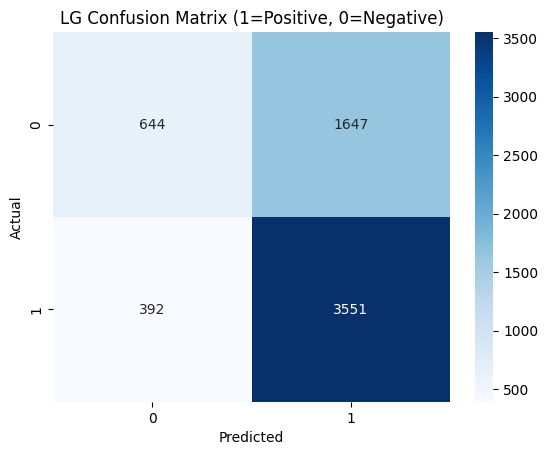

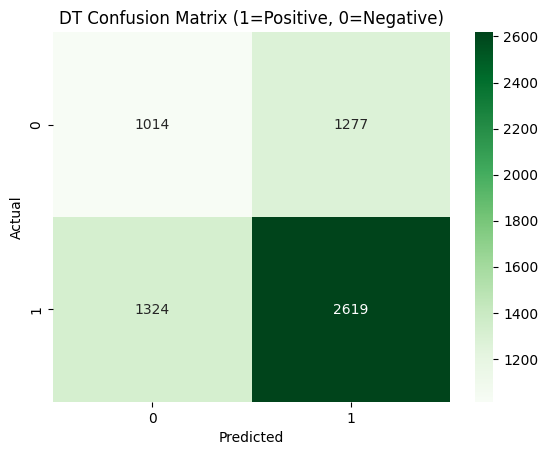

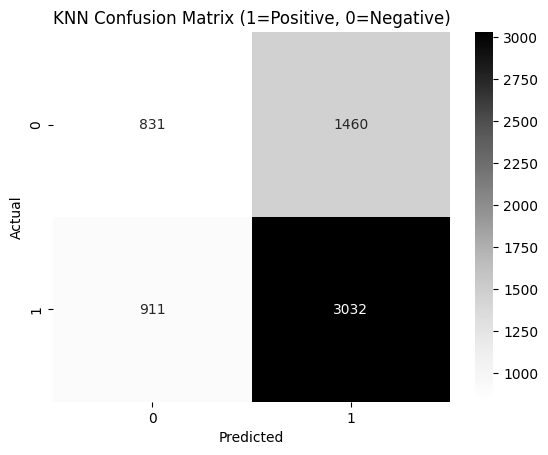

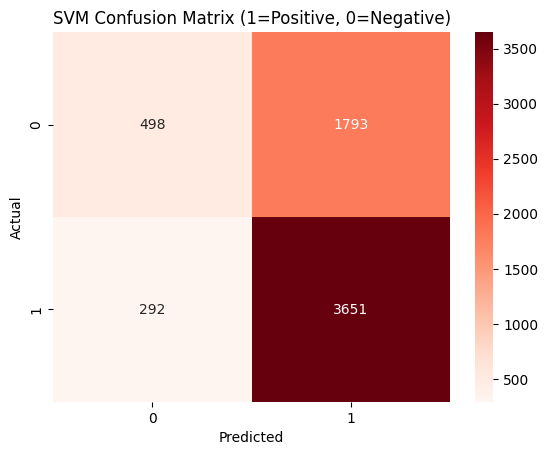

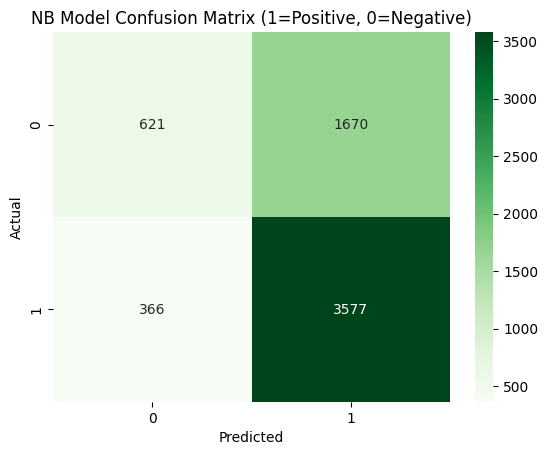

In [343]:
#ploting confussion matrix
import seaborn as sns

sns.heatmap(logr_cmat, annot=True,fmt="d", cmap="Blues")
plt.title("LG Confusion Matrix (1=Positive, 0=Negative)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

sns.heatmap(dt_cmat, annot=True,fmt="d", cmap="Greens")
plt.title("DT Confusion Matrix (1=Positive, 0=Negative)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

sns.heatmap(knn_cmat, annot=True,fmt="d", cmap="Greys")
plt.title("KNN Confusion Matrix (1=Positive, 0=Negative)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

sns.heatmap(svm_cmat, annot=True,fmt="d", cmap="Reds")
plt.title("SVM Confusion Matrix (1=Positive, 0=Negative)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

sns.heatmap(nb_cmat, annot=True,fmt="d", cmap="Greens")
plt.title("NB Model Confusion Matrix (1=Positive, 0=Negative)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()





In [340]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Define the SVM model
svm_model = SVC(kernel='rbf')

# Define the hyperparameters to tune
param_grid = {
    'C': [0.1, 1],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto']
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model with the tuned hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Best Hyperparameters: {'C': 1, 'gamma': 0.1}
Confusion Matrix:
 [[ 413 1878]
 [ 231 3712]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.64      0.18      0.28      2291
         1.0       0.66      0.94      0.78      3943

    accuracy                           0.66      6234
   macro avg       0.65      0.56      0.53      6234
weighted avg       0.66      0.66      0.60      6234



In [344]:
#initiate a new ensemble model
from sklearn.ensemble import VotingClassifier
#create a dictionary of our base learner models
base_learners=[('svm', svm), ('nb', nb)]
#create our voting classifier, inputting our models
ensemble_learner = VotingClassifier(base_learners, voting='hard')
#fit model to training data
ensemble_learner.fit(X_train, y_train)
#test our model on the test data

ensemble_preds=ensemble_learner.predict(X_test)

print("Hard voting ensenbles Accuracy: ", accuracy_score(y_test, ensemble_preds))
print(classification_report(y_test, ensemble_preds))
# print(f'Accuracy: {accuracy:.4f}')

Hard voting ensenbles Accuracy:  0.6709977542508823
              precision    recall  f1-score   support

         0.0       0.61      0.28      0.39      2291
         1.0       0.68      0.90      0.77      3943

    accuracy                           0.67      6234
   macro avg       0.65      0.59      0.58      6234
weighted avg       0.66      0.67      0.63      6234

